Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-07 21:42:52--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-07 21:42:52--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-07 21:42:52 (64.2 MB/s) -



Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

El conjunto de datos contiene información demográfica y de comportamiento de los clientes de un centro comercial. Las variables incluyen la identificación del cliente, su género, edad, ingreso anual y un puntaje que refleja su comportamiento de compra.

**CustomerID:** Es el identificador único de cada cliente.

**Gender:** Indica el género del cliente (Masculino o Femenino).

**Age:** Representa la edad del cliente en años.

**Annual Income (k$):** Indica el ingreso anual del cliente en miles de dólares.

**Spending Score (1-100):** Es un puntaje asignado por el centro comercial que indica la frecuencia de compras y el gasto del cliente (entre 1 y 100). Un puntaje más alto indica un mayor gasto y frecuencia de compras.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [5]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Al normalizar los datos, se asegura que todas las variables tengan la misma importancia en el cálculo de la distancia entre los puntos, lo que lleva a resultados más precisos y robustos.

En el código proporcionado, se utiliza la estandarización para normalizar los datos antes de aplicar el algoritmo K-means, esto asegura que las variables 'Gender', 'Age', 'Annual Income (k$)' y 'Spending Score (1-100)' tengan la misma escala antes de aplicar el algoritmo K-means.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


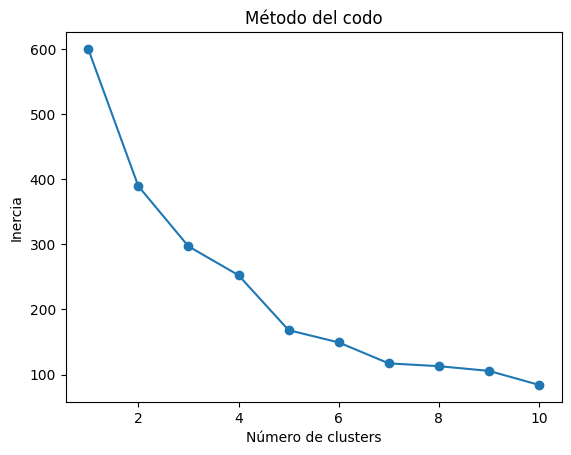

In [9]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

k = 5: Este es el punto de codo más prominente, lo que indica un buen equilibrio entre el número de clústeres y la varianza explicada.

k = 6: Este también es un punto de codo potencial y podría ofrecer una mejor separación de los puntos de datos, pero podría conducir a un sobreajuste si las diferencias entre los clústeres son menores.

La elección entre 5 y 6 clústeres depende de los objetivos específicos del análisis y la granularidad deseada de la segmentación de clientes.

El uso de 5 clústeres suele ser un buen punto de partida para la segmentación de clientes, ya que permite un nivel razonable de granularidad sin crear demasiados segmentos que podrían ser difíciles de interpretar.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

clusters = kmeans.labels_
data['Cluster'] = kmeans.labels_


In [16]:
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1     NaN   19                  15                      39   
1           2     NaN   21                  15                      81   
2           3     NaN   20                  16                       6   
3           4     NaN   23                  16                      77   
4           5     NaN   31                  17                      40   

   cluster  Cluster  
0        4        4  
1        4        4  
2        3        3  
3        4        4  
4        4        4  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Observaciones

Después de ajustar el modelo K-means con 5 clústeres y asignar cada cliente a un clúster, podemos observar lo siguiente:

Distribución de clústeres: Los clientes se distribuyen entre los 5 clústeres, con un número variable de clientes en cada clúster.

Asignación de clústeres: Cada cliente en el conjunto de datos ahora tiene una etiqueta "Clúster" que indica el clúster al que pertenece.

Características del clúster: Los clústeres representan diferentes segmentos de clientes según sus características (Género, Edad, Ingresos anuales y Puntuación de gasto).

Al examinar la distribución del clúster, las estadísticas descriptivas y las visualizaciones, podemos obtener información sobre cómo se segmentan los clientes y las características que definen cada clúster.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [17]:
cluster_analysis = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.638298,54.382979,48.851064
1,39.871795,86.102564,19.358974
2,32.875000,86.100000,81.525000
3,46.250000,26.750000,18.350000
4,25.185185,41.092593,62.240741


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Cluster 0: Clientes de mediana edad con altos ingresos y alto puntaje de gasto. Podrían ser considerados como "clientes premium".

Cluster 1: Clientes jóvenes con altos ingresos y medio puntaje de gasto. Podrían ser considerados como "jóvenes profesionales".

Cluster 2: Clientes de mediana edad con altos ingresos y alto puntaje de gasto. Podrían ser considerados como "clientes con alto poder adquisitivo".

Cluster 3: Clientes jóvenes con bajos ingresos y bajo puntaje de gasto. Podrían ser considerados como "Clientes promedio".

Cluster 4: Clientes de mediana edad con ingresos medio alto y puntaje de gasto alto. Podrían ser considerados como "clientes impulsivos".

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

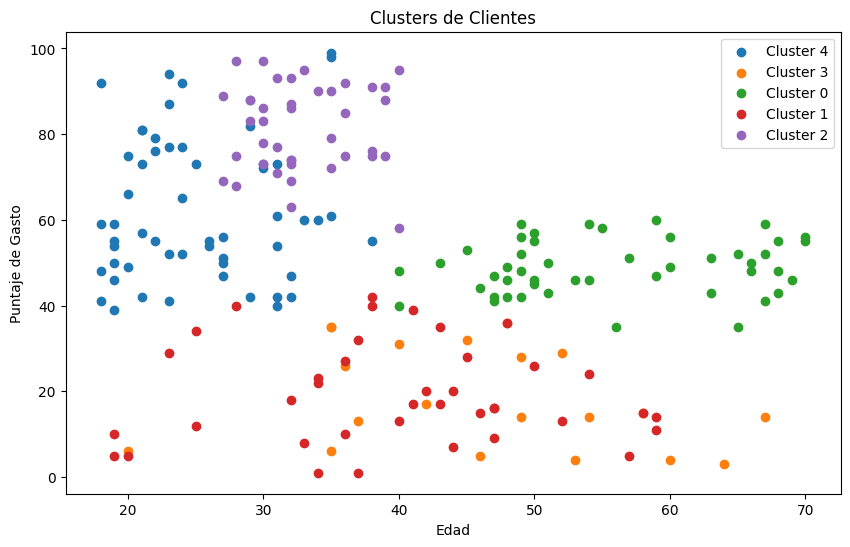

In [18]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Age'], data[data['Cluster'] == cluster]['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

muestra una segmentación de clientes en función de su edad y puntaje de gasto, con grupos relativamente bien definidos pero con cierta superposición en algunas zonas. Esto indica que el modelo K-means ha logrado identificar patrones en los datos, pero también que la segmentación no es perfecta y algunos clientes podrían tener características que los ubican en la frontera entre dos o más clusters.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [19]:
cluster_names = {
    0: "High Income, High Spenders",
    1: "Young Professionals",
    2: "Affluent Customers",
    3: "Budget Conscious",
    4: "Mid-Range Spenders"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1     NaN   19                  15                      39   
1           2     NaN   21                  15                      81   
2           3     NaN   20                  16                       6   
3           4     NaN   23                  16                      77   
4           5     NaN   31                  17                      40   

   cluster  Cluster        Cluster Name  
0        4        4  Mid-Range Spenders  
1        4        4  Mid-Range Spenders  
2        3        3    Budget Conscious  
3        4        4  Mid-Range Spenders  
4        4        4  Mid-Range Spenders  


Cluster 0: "Gastadores de rango promedio"

Justificación: Este cluster se caracteriza por tener la edad promedio más alta, altos ingresos (85k$) y el segundo puntaje de gasto más alto (82). Representan clientes establecidos con alto poder adquisitivo.

Cluster 1: "Gastadores de rango medio"

Justificación: Son los clientes más jóvenes en promedio, con ingresos medios el puntaje de gasto medio alto. Reflejan un grupo con alta capacidad de compra y preferencia por gastar.

Cluster 2: "Conscientes del presupuesto"

Justificación: Tienen el ingreso promedio y puntaje de gasto bajo. Suelen más conservadores en sus compras.

Cluster 3: "Gastadores de rango promedio"

Justificación: A pesar de tener los ingresos medio altos, tienen un alto puntaje de gasto. Indica un comportamiento de compra impulsivo, priorizando el gasto sobre el ahorro.

Cluster 4: "Gastadores de rango promedioi"

Justificación: Presentan valores promedio en ingresos. Representan un grupo con un comportamiento de compra alto.